# Documentação

`!pip install yfinance`

### Artigo original:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Uso do Auto-ARIMA:
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd



## Requisitos
~~~python
!pip install yfinance
~~~

In [2]:
ticker = "HGLG11"
yticker = "HGLG11.SA"
n_steps = 30

In [92]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import json
import datetime


from functions import get_finance_data, arima_forecast, get_auto_arima, get_auto_sarima, stationary_test

# from pmdarima.arima import auto_arima

plt.style.use('fivethirtyeight')

# criando a pasta de registro de calibração
if not os.path.isdir("files"):
    os.mkdir("files")

In [4]:
data = get_finance_data(yticker)
train = data['Low'][:len(data)-n_steps+1]
test = data['Low'][-n_steps:]

In [5]:
with open('files/db.json') as json_file:
    jdata = json.load(json_file)

In [90]:
my_arima = []
my_sarima = []

if os.path.isfile("files/db.json"):
    with open('files/db.json','r+') as jfile:
        jdata = json.load(jfile)
        if ticker in jdata.keys():
            if "ARIMA" in jdata[ticker]:
                my_arima.append(jdata[ticker]["ARIMA"]["parametros"][0])
                my_arima.append(jdata[ticker]["ARIMA"]["parametros"][1])
                my_arima.append(jdata[ticker]["ARIMA"]["parametros"][2])
            else:
                arima_model = get_auto_arima(train)
                my_arima.append(arima_model.order[0])
                my_arima.append(arima_model.order[1])
                my_arima.append(arima_model.order[2])
                json.dump(jdata,jfile)
            if "SARIMA" in jdata[ticker]:
                my_sarima.append(jdata[ticker]["SARIMA"]["parametros"][0])
                my_sarima.append(jdata[ticker]["SARIMA"]["parametros"][1])
                my_sarima.append(jdata[ticker]["SARIMA"]["parametros"][2])
                my_sarima.append(jdata[ticker]["SARIMA"]["parametros"][3])
                my_sarima.append(jdata[ticker]["SARIMA"]["parametros"][4])
                my_sarima.append(jdata[ticker]["SARIMA"]["parametros"][5])
                my_sarima.append(jdata[ticker]["SARIMA"]["parametros"][6])
            else:
                sarima_model = get_auto_sarima(train)
                my_sarima.append(arima_model.order[0])
                my_sarima.append(arima_model.order[1])
                my_sarima.append(arima_model.order[2])
                my_sarima.append(arima_model.seasonal_order[0])
                my_sarima.append(arima_model.seasonal_order[1])
                my_sarima.append(arima_model.seasonal_order[2])
                my_sarima.append(arima_model.seasonal_order[3])
                
            if "TensorFlow" in jdata[ticker]:
                print(jdata[ticker]["TensorFlow"]["parametros"])
            else:
                print('rodar Tensor Flow '+ticker)
        else:
            print('rodar todos')
            arima_model = get_auto_arima(train)
            my_arima.append(arima_model.order[0])
            my_arima.append(arima_model.order[1])
            my_arima.append(arima_model.order[2])
            sarima_model = get_auto_sarima(train)
            my_sarima.append(sarima_model.order[0])
            my_sarima.append(sarima_model.order[1])
            my_sarima.append(sarima_model.order[2])
            my_sarima.append(sarima_model.seasonal_order[0])
            my_sarima.append(sarima_model.seasonal_order[1])
            my_sarima.append(sarima_model.seasonal_order[2])
            my_sarima.append(sarima_model.seasonal_order[3])
            hoje = datetime.datetime.now().strftime("%d-%m-%Y")
            jdata[ticker]={}
            jdata[ticker].update({"yticker":yticker, "ARIMA":{"parametros":my_arima,"train_date":hoje}, "SARIMA":{"parametros":my_sarima,"train_date":hoje})
            jfile.seek(0)
            json.dump(jdata, jfile)
            


rodar todos


C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 0.990 seconds

Best model:  ARIMA(0,1,0)(0,1,3)[12]          
Total fit time: 61.166 seconds


In [95]:
datetime.datetime.now().strftime("%d-%m-%Y")

'31-12-2020'

In [91]:
jdata


{'BBFI11B': {'yticker': 'BBFI11B.SA',
  'ARIMA': {'parametros': [1, 0, 0, 1, 1, 1], 'train_date': '30/12/2020'},
  'SARIMA': {'parametros': [1, 0, 2, 0, 1, 2, 12],
   'train_date': '30/12/2020'}},
 'RBBV11': {'yticker': 'BBFI11B.SA',
  'ARIMA': {'parametros': [1, 0, 0, 1, 1, 1], 'train_date': '30/12/2020'},
  'SARIMA': {'parametros': [1, 0, 2, 0, 1, 2, 12],
   'train_date': '30/12/2020'}},
 'HGLG11': {'yticker': 'HGLG11.SA',
  'ARIMA': {'parametros': [2, 1, 1], 'train_date': '30/12/2020'},
  'SARIMA': {'parametros': [2, 1, 1, 0, 0, 0, 0], 'train_date': '30/12/2020'}}}

In [67]:
jdata

{'BBFI11B': {'yticker': 'BBFI11B.SA',
  'ARIMA': {'parametros': [1, 0, 0, 1, 1, 1], 'train_date': '30/12/2020'},
  'SARIMA': {'parametros': [1, 0, 2, 0, 1, 2, 12],
   'train_date': '30/12/2020'}},
 'RBBV11': {'yticker': 'BBFI11B.SA',
  'ARIMA': {'parametros': [1, 0, 0, 1, 1, 1], 'train_date': '30/12/2020'},
  'SARIMA': {'parametros': [1, 0, 2, 0, 1, 2, 12],
   'train_date': '30/12/2020'}},
 'HGLG11': {'yticker': 'HGLG11.SA',
  'ARIMA': {'parametros': [1, 0, 0, 1, 1, 1], 'train_date': '30/12/2020'},
  'SARIMA': {'parametros': [1, 0, 2, 0, 1, 2, 12],
   'train_date': '30/12/2020'}}}

In [7]:
def desvio(registro):
    return ((registro['predição']/registro['valor'])-1)*100

In [12]:
df_arima = arima_forecast(train, next=n_steps, p=my_arima[0], d=my_arima[1], q=my_arima[2])

C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided

In [9]:
df_arima

array([167.69829444, 167.10219134, 167.27945928, 166.86654256,
       166.88197822, 166.59032565, 166.51813474, 166.28923199,
       166.17220961, 165.97531747, 165.83544238, 165.65486437,
       165.50334304, 165.33107896, 165.17362255, 165.00559536,
       164.84511435, 164.67924634, 164.51722396, 164.35245628,
       164.1896484 , 164.02544148, 163.86223329, 163.69831213,
       163.53489994, 163.37112441, 163.20760826, 163.04390695,
       162.88033782, 162.71667433])

In [13]:
df = pd.DataFrame({'ARIMA':df_arima,'valor':test}, index=test.index)
prd = df
df

,ARIMA,valor
Date,,
2020-11-16,167.698294,167.500000
2020-11-17,167.102191,167.500000
2020-11-18,167.279459,168.000000
2020-11-19,166.866543,168.119995
2020-11-23,166.881978,167.000000
2020-11-24,166.590326,166.429993
2020-11-25,166.518135,166.649994
2020-11-26,166.289232,167.070007
2020-11-27,166.172210,167.899994


<function matplotlib.pyplot.show(*args, **kw)>

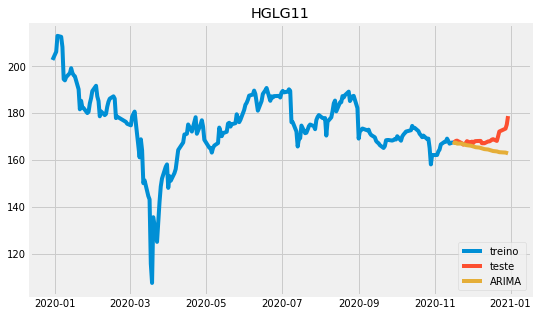

In [14]:
plt.figure(figsize=(8,5))
plt.plot(train, label="treino")
plt.plot(test, label="teste")
plt.plot(prd['ARIMA'], label="ARIMA")
plt.legend(loc='lower right')
plt.title(label=ticker)
plt.show

In [ ]:
test

In [ ]:
train[:-1]